## Multilayer Perceptrons
#### Multilayer Perceptrons are the simplest form of a neural network. 


In [1]:
!pip install tensorflow

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [3]:
!pip install numpy

In [4]:
## Refer the book for all the theory Chapter 10
## We will use the iris dataset using Perceptron (Simplest Artificial Neural Network)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target ==0).astype(int)

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

## We will be using Keras as it allows to easily build NN

In [5]:
# Just checking if tensorflow or keras is installed properly
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.20.0-rc0'

In [6]:
keras.__version__

'3.11.1'

## Building a simple image classifier
#### We will use the "Fashion MNIST" dataset which is more diverse than the MNIST


In [7]:
#Using Keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test, y_test) = fashion_mnist.load_data()


#=====IMP======
# The dataset gives in grouped manner thats why the training and test are grouped together

In [8]:
# In this dataset the image is represeted in 28x28 array rather than    1D array of size 784

X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
# As gradient descent is going to get used we will scale the input features

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Validation Set: It is small part of the training set that is used to check how the model is doing 
# during the Training Process
# It is not used to train the model

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# We are giving names to the labels from index 0 to 9

In [12]:
class_names[y_train[0]]

'Coat'

## Creating the Model using Sequential API 



In [13]:
# Classification MLP with 2 hidden layers 

## "Sequential" MEANS STACKING LAYERS IN A SEQUENCE
## for eg layer1->layer2->layer3

model = keras.models.Sequential([ #Sequential = will stack all the layers in straight 
    keras.layers.Flatten(input_shape=[28,28]), #Converting to 1D array
    keras.layers.Dense(300, activation = "relu"),#1st Hidden layer = 300 neurons
    keras.layers.Dense(100, activation = "relu"),#2nd Hidden Layer = 100 neurons
    keras.layers.Dense(10, activation = "softmax")#Output Layer = 10 neurons → One for each class (digits 0–9 in MNIST).
]) 


#We are not training the model yet 
# We just initialized the architecture of the Neural Network


c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Models summary() method displays all the models layers, name etc

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

## Compiling the model

In [16]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])  # This does not train the model, just preparing it to train

## Training and Evaluating the Model

In [17]:
# The model is ready to train just calling fit()

history = model.fit(X_train, y_train, epochs= 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7625 - loss: 0.7258 - val_accuracy: 0.8226 - val_loss: 0.5188
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8301 - loss: 0.4909 - val_accuracy: 0.8522 - val_loss: 0.4455
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8452 - loss: 0.4444 - val_accuracy: 0.8630 - val_loss: 0.4096
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8537 - loss: 0.4167 - val_accuracy: 0.8652 - val_loss: 0.3951
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8599 - loss: 0.3970 - val_accuracy: 0.8632 - val_loss: 0.3956
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.3809 - val_accuracy: 0.8670 - val_loss: 0.3765
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - loss: 0.3668 - val_accuracy: 0.8716 - val_loss: 0.3680
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8744 - loss: 0.3556 - 

(0.0, 1.0)

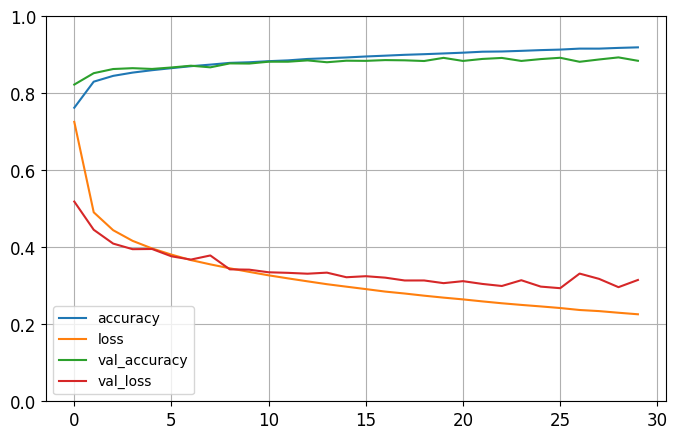

In [18]:
## Learning curve

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]

In [19]:
## Evaluating the model

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 59.9151


[59.91514205932617, 0.8568999767303467]

In [20]:
## Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
import numpy as np

y_prob = model.predict(X_new)   # Gives probabilities
y_pred = np.argmax(y_prob, axis=-1)  # Picks the class with highest probability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [23]:
## Building Regression MLP using Sequential API

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target) 


X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full # In this we are further splitting the X_train_full and 
    # y_train_full into the training and validation set
)

## For training we use X_train then for validation X_valid and for testing X_test


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# If we use fit_transform for X_valid and X_test it is wrong because the model would 
# learn the parameters

# fit() → learns the parameters (mean, std for StandardScaler) from the data.
# transform() → uses those learned parameters to scale the data.

In [24]:
# Here the output layer has only 1 neuron because it is a regression prb 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # Just pretending these are new instances
y_pred = model.predict(X_new)

Epoch 1/20


c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7982 - val_loss: 0.5462
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5076 - val_loss: 0.5618
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7705 - val_loss: 0.5076
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4731 - val_loss: 0.4704
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4470 - val_loss: 0.4637
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4377 - val_loss: 0.4591
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4287 - val_loss: 0.4512
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4211 - val_loss: 0.4539
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4128 - val_loss: 0.4385
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4067 - val_loss: 0.4337
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4000 - val_loss: 0.4365
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

## Building Complex Models using the Functional API

In [25]:
# Now we are building a non-sequential model us
## "Functional" MEANS STACKING LAYERS IN ANY WAY
## for eg merging layers, skipping layers, etc

input_ = keras.layers.Input(shape=X_train.shape[1:]) # Input Layer
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # 1st Hidden Layer
hidden2 = keras.layers.Dense(30, activation= "relu")(hidden1) # 2nd Hidden Layer
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])

## In the bracket we are specifying the input to each layer

In [26]:
## Handling multiple inputs REFER BOOK PAGE 310

input_A = keras.layers.Input(shape=[5], name = "wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B) # 1st Hidden Layer
hidden2 = keras.layers.Dense(30, activation ="relu")(hidden1) # 2nd Hidden Layer
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

In [27]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs =20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2605 - val_loss: 1.0327
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7982 - val_loss: 0.7098
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6865 - val_loss: 0.6567
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6423 - val_loss: 0.6271
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6126 - val_loss: 0.6029
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5899 - val_loss: 0.5839
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5715 - val_loss: 0.5688
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5567 - val_loss: 0.5566
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5437 - val_loss: 0.5459
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5338 - val_loss: 0.5379
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5252 - val_loss: 0.5306
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [28]:
## For multiple output REFER PAGE 312 
# [.......] # uper jaisa same
# output = keras.layers.Dense(1, name = "main_output")(concat)
# aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
# model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [29]:
## Loss Function for each output 
model .compile(loss = ["mse", "mse"], loss_weights=[0.9, 0.1], optimizer = "sgd") #sgd = Stochastic Gradient Descent

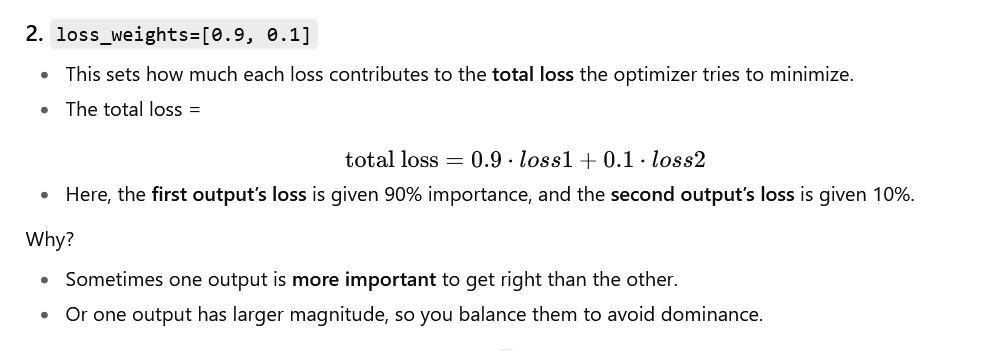

In [30]:
## In this eg the output of "output" & "aux_output" try to predict the same thing soo
# they shd have same labels

history = model.fit(
    [X_train_A, X_train_B],[y_train, y_train], epochs =20,
    validation_data = ([X_valid_A, X_valid_B],[y_valid, y_valid]))

Epoch 1/20


ValueError: Expected an instance of list, got <tf.Tensor 'functional_3_1/output_1/Add:0' shape=(None, 1) dtype=float32>.

## Using the subclassing API to build Dynamic Models


 Sometimes we need to make the model dynamic , like changing its architecture 
 as some have loops etc
#### "So we use SUBCLASSING API"

In [ ]:
class WideAndDeepModel(keras.Model):                   # kwargs means to accept any number of extra keyword arguments
    def __init__(self, units = 30,activation = "relu", **kwargs): # __init__ is used to initialize the layers
        super().__init__(**kwargs) #this will handle the standard argumenst eg name
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):  # call is used to define the structure of the model 
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

In [ ]:
model.summary()

Model: "wide_and_deep_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Saving and restoring the model 
## Why saving the model is important?
## Saving the model allows us to save the trained model and use it later for making predictions because large
## datasets take a long time to train the model and we don't want to train it again and again


 # model = keras.models.Sequential( )
 model.compile

### Using Callbacks 


In [ ]:
[...]
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=30, callbacks=[checkpoint_cb])


### Early Stopping 
It is a technique where in the model trainign is stopped until its validation accuracy improves.

In [ ]:
## To implement early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)
history = model.fit(X_train,y_train, epochs = 10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

## We can also use EarlyStopping callback to stop the training when the validation loss stops improving

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data =(X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
## CUSTOM CALLBACK

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))


## Using TensorBoard for Visualization
TensorBoard is a visualization tool that comes with TensorFlow. It can be used to visualize the data,
models, and training process.


In [ ]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


##Keras provides TensorBoard() callback
[..] #Building and Compiling the model 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid),
                    callbacks = [tensorboard_cb])

## Fine Tuning Neural Network Hyperparameters
In an NN there are many hyperparameters to tweak
For DL , RandomizedSearchCV is preferred and GridSearch is slow for NN


In [ ]:
## The build_model just returns the parameters can be tweaked to change hyperparameters

def build_model (n_hidden =1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model 

# a function whose only job is to build and return a Keras model with hyperparameters as 
# arguments so that tools like GridSearchCV or RandomizedSearchCV can call it over and over 
# with different settings.

In [ ]:
# KerasRegressor — is simply a wrapper that makes your Keras model
# look like a scikit-learn regressor so you can use tools like GridSearchCV or RandomizedSearchCV.


#KerasRegressor wraps the build_model to make it compatible 

keras_reg.fit(X_train, y_train, epochs=100,validation_data = (X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


In [ ]:
## NOW FINALLY USING RandomizedSearchCV to find the best hyperparameters

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


In [ ]:
## Accessing best params
rnd_search_cv.best_params_
rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model # This is the best model 

### Number of Neurons Per Hidden layer
For the Fashion MNIST dataset it contains                    
----------------  : 28x28 pixel images ==> 784 neurons                                      
---------------- : 10 classes ==> 10 output neurons

### Learning Rate, Batch Size, and Epochs
Learning Rate controls the weight of the network in response to errors seen during training towards minimum of loss function